#  LAB 7 : TAYLOR SERIES

# 1. Reproduce Taylor Series in Python from Python for Undergraduate Engineers for the functions in the Taylor Series figure above.



# *    **$e^x$**



Hacemos la serie de Taylor de la función escribiendo cada termino indivualmente, tomando x=0.

In [1]:
import math
x = 0
e_to_0 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_0)

1.0


Hacemos la serie de Taylor de la función escribiendo cada termino indivualmente, tomando x=2 .

In [2]:
import math
x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


Lo comparamos con el resultado que genera la función directa de la libreria math, el cual da una aproximación más exacta.

In [3]:
print(math.exp(2))

7.38905609893065


Usamos un ciclo for para calcular el resultado de forma más aproximada con las series de Taylor. Vemos que entre más iteraciones, más se aproxima el resultado al valor real. Probaremos con 5 iteraciones y con 10 iteraciones, también comparandolo con el valor de la función directa.

In [4]:
import math

x = 2
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.0


In [5]:
import math

x = 2
e_to_2 = 0

for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.3887125220458545


In [6]:
print(math.exp(2))

7.38905609893065


Ahora se utiliza el ciclo dentro de una función, para modificar facilmente el número de ciclos deseados.

In [7]:
import math

def func_e_to_2(n):
    x = 2
    e_to_2 = 0
    for i in range(n):
        e_to_2 += x**i/math.factorial(i)
        
    
    return e_to_2

In [8]:
out = func_e_to_2(10)
print(out)

7.3887125220458545


También podemos crear una funcion para modificar facilmente como parámetro el valor de x.
En este caso la usamos con x=2 y x=5

In [9]:
import math

def func_e(x, n):
    e_approx = 0
    for i in range(n):
        num=x**i
        denom=math.factorial(i)
        e_approx += (num)/(denom)
    
    return e_approx

In [10]:
out = func_e(2,10)
print(out)

7.3887125220458545


In [11]:
out = func_e(5,10)
print(out)

143.68945656966488


Podemos ver que tan cercano es el resultado obtenido con el resultado de la función de la libreria math cuando x=5.

In [12]:
out = math.exp(5)
print(out)

148.4131591025766


Ahora programamos un ciclo para ver como en cada iteración de la serie de Taylor, este valor se acerca más al real. Calculamos el error en cada iteración.

In [13]:
import math

x = 5
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 148.4131591025766, error = 147.4131591025766
2 terms: Taylor Series approx= 6.0, exp calc= 148.4131591025766, error = 142.4131591025766
3 terms: Taylor Series approx= 18.5, exp calc= 148.4131591025766, error = 129.9131591025766
4 terms: Taylor Series approx= 39.33333333333333, exp calc= 148.4131591025766, error = 109.07982576924327
5 terms: Taylor Series approx= 65.375, exp calc= 148.4131591025766, error = 83.0381591025766
6 terms: Taylor Series approx= 91.41666666666667, exp calc= 148.4131591025766, error = 56.99649243590993
7 terms: Taylor Series approx= 113.11805555555556, exp calc= 148.4131591025766, error = 35.29510354702104
8 terms: Taylor Series approx= 128.61904761904762, exp calc= 148.4131591025766, error = 19.79411148352898
9 terms: Taylor Series approx= 138.30716765873015, exp calc= 148.4131591025766, error = 10.105991443846449
10 terms: Taylor Series approx= 143.68945656966488, exp calc= 148.4131591025766, error = 4.723702532911

Con este ciclo, podriamos modificarlo para que calcule cuantas iteraciones se necesita para que la serie de Taylor se aproxime al valor real con un error menor al que se quiere. En este ejemplo se quiere un error menor a 1.

In [14]:
import math

x = 5
for i in range(1,20):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

12 terms: Taylor Series approx= 147.60384850489015, exp calc= 148.4131591025766, error = 0.8093105976864479


Ahora tomando las funciones ( la creada por series de Taylor y la de la libreria math), creamos un gráfico con los resultados de $-20$ a $20$

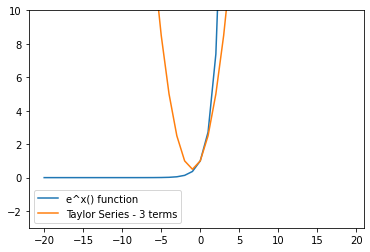

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-20,20)
p_cos = np.exp(angles)
t_cos = [func_e(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-3,10])
ax.legend(['e^x() function','Taylor Series - 3 terms'])

plt.show()

Ahora graficaremos distintas iteraciones del ciclo en la función que usa series de Taylor, para demostrar que entre más iteraciones, más se acerca la función a un resultado real, o , disminuye su error.

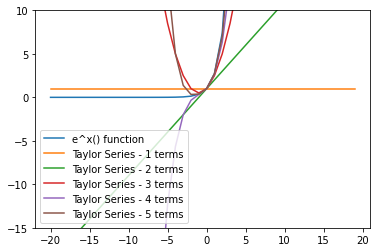

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-20,20)
p_cos = np.exp(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)


for i in range(1,6):
    t_cos = [func_e(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-15,10])


legend_lst = ['e^x() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# * **Sen(x)**

Teniendo en cuenta esta función, programamos una función que retorne la aproximación por serie de Taylor de la función dado un x. En este ejemplo tomaremos x= 45 grados y 5 iteraciones.

In [17]:
import math

def func_sen(x, n):
    sen_approx = 0
    for i in range(n):
        coef = x*((-1)**i)
        num = x**(2*i)
        denom = math.factorial(1+(2*i))
        sen_approx += ( coef ) * ( (num)/(denom) )
    
    return sen_approx

In [18]:
angle_rad = (math.radians(45))
out = func_sen(angle_rad,5)
print(out)

0.7071067829368671


Este resultado lo comparamos con el de la función de la libreria math.

In [19]:
out = math.sin(angle_rad)
print(out)

0.7071067811865475


Ahora tomando las funciones ( la creada por series de Taylor y la de la libreria math), creamos un gráfico con los resultados de $-2\pi $ a $2\pi $

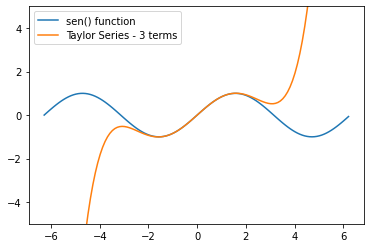

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_sen = np.sin(angles)
t_sen = [func_sen(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_sen)
ax.plot(angles,t_sen)
ax.set_ylim([-5,5])
ax.legend(['sen() function','Taylor Series - 3 terms'])

plt.show()

Ahora graficaremos distintas iteraciones del ciclo en la función que usa series de Taylor, para demostrar que entre más iteraciones, más se acerca la función a un resultado real, o , disminuye su error.

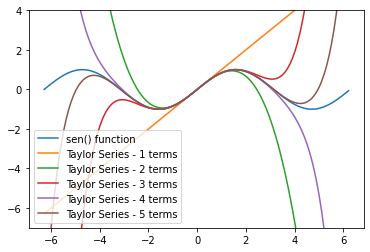

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_sen = np.sin(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_sen)


for i in range(1,6):
    t_sen = [func_sen(angle,i) for angle in angles]
    ax.plot(angles,t_sen)

ax.set_ylim([-7,4])


legend_lst = ['sen() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# *   **COS(x)**

Teniendo en cuenta esta función, programamos una función que retorne la aproximación por serie de Taylor de la función dado un x. En este ejemplo tomaremos x= 45 grados y 5 iteraciones.

In [23]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

In [24]:
angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print(out)

0.7071068056832942


Este resultado lo comparamos con el de la función de la libreria math.

In [25]:
out = math.cos(angle_rad)
print(out)

0.7071067811865476


Ahora tomando las funciones ( la creada por series de Taylor y la de la libreria math), creamos un gráfico con los resultados de $-2\pi $ a $2\pi $

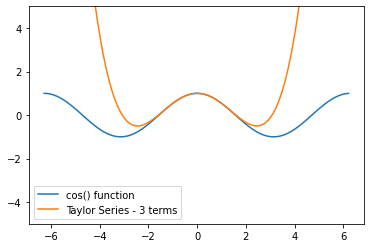

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)
t_cos = [func_cos(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['cos() function','Taylor Series - 3 terms'])

plt.show()

Ahora graficaremos distintas iteraciones del ciclo en la función que usa series de Taylor, para demostrar que entre más iteraciones, más se acerca la función a un resultado real, o , disminuye su error.

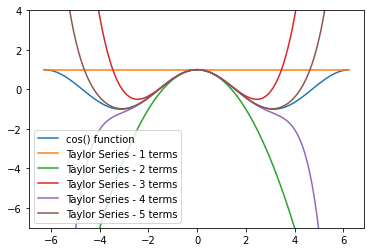

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)


for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])


legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# *    $$ \frac{ 1}{1-x}$$ 

Teniendo en cuenta esta función, programamos una función que retorne la aproximación por serie de Taylor de la función dado un x. En este ejemplo tomaremos x= 0 grados y 5 iteraciones.

In [28]:
import math

def func_tayl(x, n):
    tay_approx = 0
    for i in range(n):
        tay_approx += x**(i)
    
    return tay_approx

In [41]:

out = func_tayl(-3,5)
print(out)

61


Este resultado lo comparamos con el de la función creada por python.

In [42]:
out = 1/(1-(-3))
print(out)

0.25


Ahora tomando las funciones ( la creada por series de Taylor y la de la función de python), creamos un gráfico con los resultados de $10 $ a $1 $ (tomamos esta funcion menor a 1)

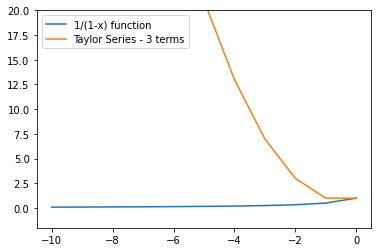

In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-10,1)
p_tayl = np.array(1/(1-angles))
t_tayl = [func_tayl(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_tayl)
ax.plot(angles,t_tayl)
ax.set_ylim([-2,20])
ax.legend(['1/(1-x) function','Taylor Series - 3 terms'])

plt.show()

Ahora graficaremos distintas iteraciones del ciclo en la función que usa series de Taylor, para demostrar que entre más iteraciones, más se acerca la función a un resultado real, o , disminuye su error.

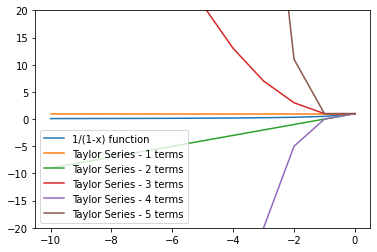

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(-10,1)
p_tayl =np.array(1/(1-angles))

fig, ax = plt.subplots()
ax.plot(angles,p_tayl)


for i in range(1,6):
    t_tayl = [func_tayl(angle,i) for angle in angles]
    ax.plot(angles,t_tayl)

ax.set_ylim([-20,20])


legend_lst = ['1/(1-x) function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# *   **ln(x)**

Teniendo en cuenta esta función, programamos una función que retorne la aproximación por serie de Taylor de la función dado un x. En este ejemplo tomaremos x= 1 grados y 5 iteraciones.

In [46]:
import math

def func_ln(x, n):
    ln_approx = 0
    for i in range(1,n):
        coef = (-1)**(i-1)
        num = (x-1)**(i)
        denom = i
        ln_approx += ( coef ) * ( (num)/(denom) )
    
    return ln_approx

In [53]:

out = func_ln(1,5)
print(out)

0.0


Este resultado lo comparamos con el de la función de la libreria math.

In [52]:
out=math.log(1, 10)
print(out)

0.0


Ahora tomando las funciones ( la creada por series de Taylor y la de la libreria math), creamos un gráfico con los resultados de $ 0.5 $ a $ 2 $

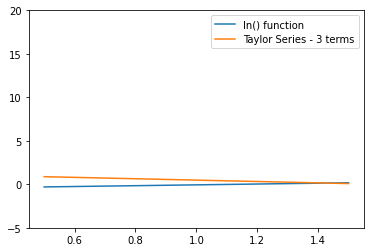

In [59]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(0.5,2)
p_ln = np.log10(angles)
t_ln = [func_cos(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_ln)
ax.plot(angles,t_ln)
ax.set_ylim([-5,20])
ax.legend(['ln() function','Taylor Series - 3 terms'])

plt.show()

Ahora graficaremos distintas iteraciones del ciclo en la función que usa series de Taylor, para demostrar que entre más iteraciones, más se acerca la función a un resultado real, o , disminuye su error.

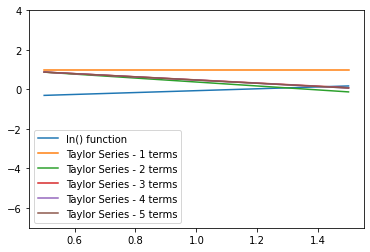

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt


angles = np.arange(0.5,2)
p_ln = np.log10(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_ln)


for i in range(1,6):
    t_ln = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_ln)

ax.set_ylim([-7,4])


legend_lst = ['ln() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# 2. Reproduce Taylor Series Expansion with Python from Data Science Fabirc for the functions in the Taylor Series figure above.


# *    **$e^x$**

Para ver la serie de taylor, se crea la función para definir la serie de la función.

In [104]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp, log
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [62]:
x = Symbol('x')

In [63]:

def taylor(function, x0, n):
   
    return function.series(x,x0,n).removeO()

Podemos imprimir la función con un número indicado de iteraciones (orden de la ecuación) ,que entre más iteraciones, más exacta es. La definimos en un punto en especial, en este ejemplo tomamos el punto x=1.

In [64]:
print('e^x =', taylor(exp(x), 0, 4))

e^x = x**3/6 + x**2/2 + x + 1


In [65]:
print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

e(1) = 8/3


Luego graficamos las funciones y como reduce su error con el paso de las iteraciones.

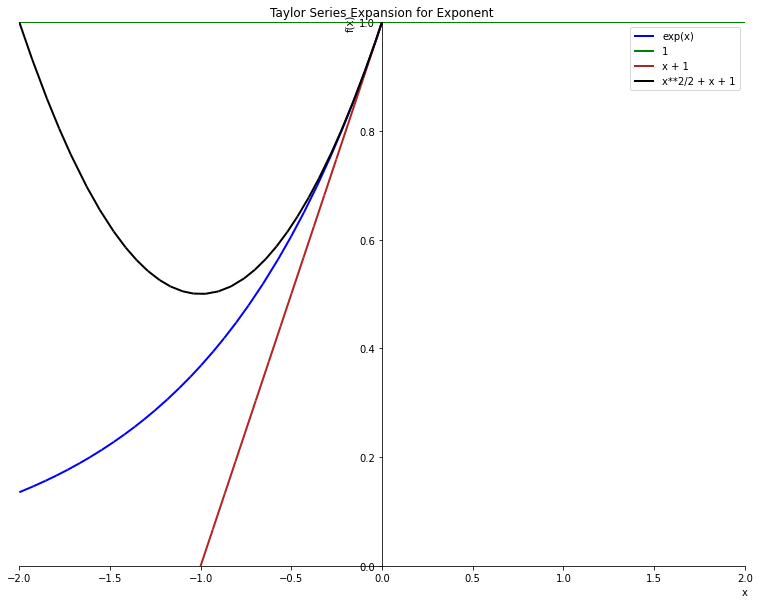

In [82]:


p = plot(exp(x),taylor(exp(x),0,1),taylor(exp(x),0,2),taylor(exp(x),0,3),
         (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Exponent'
p.show()

# * **Sen(x)**

Podemos imprimir la función con un número indicado de iteraciones (orden de la ecuación) ,que entre más iteraciones, más exacta es. La definimos en un punto en especial, en este ejemplo tomamos el punto x=1.

In [83]:
print('sin(x) =', taylor(sin(x), 0, 4))

sin(x) = -x**3/6 + x


In [84]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))


sin(1) = 5/6


Luego graficamos las funciones y como reduce su error con el paso de las iteraciones.

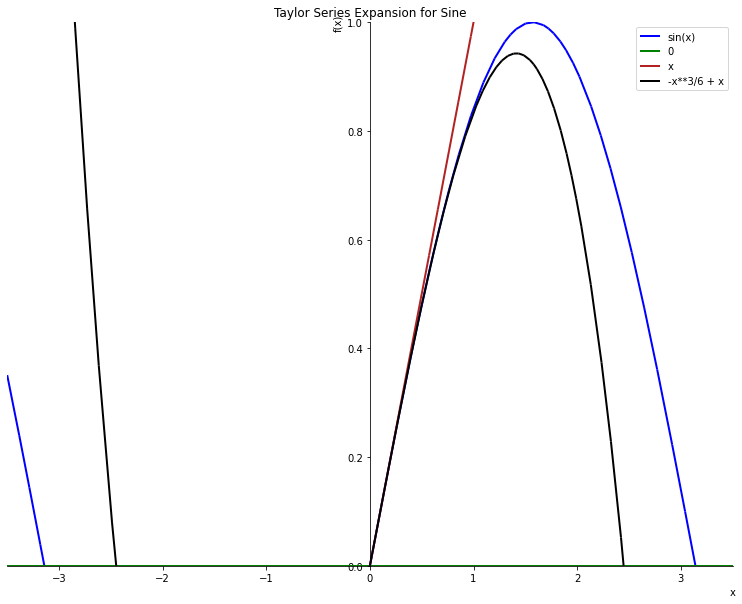

In [93]:

p = plot(sin(x),taylor(sin(x),0,1),taylor(sin(x),0,3),taylor(sin(x),0,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Sine'


p.show()

# * **Cos(x)**

Podemos imprimir la función con un número indicado de iteraciones (orden de la ecuación) ,que entre más iteraciones, más exacta es. La definimos en un punto en especial, en este ejemplo tomamos el punto x=1.

In [94]:
print('cos(x) =', taylor(cos(x), 0, 4))

cos(x) = -x**2/2 + 1


In [95]:
print('cos(1) =', taylor(cos(x), 0, 4).subs(x,1))



cos(1) = 1/2


Luego graficamos las funciones y como reduce su error con el paso de las iteraciones.

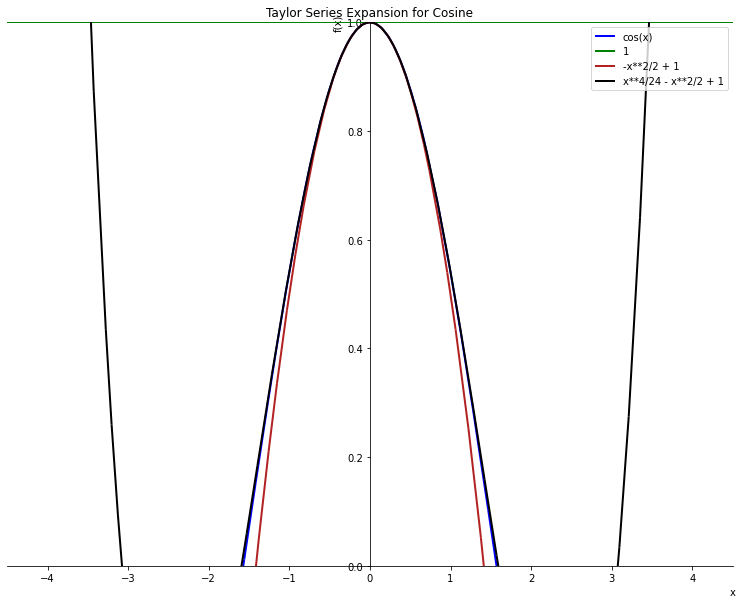

In [96]:

p = plot(cos(x),taylor(cos(x),0,2),taylor(cos(x),0,4),taylor(cos(x),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Cosine'
p.show()

# *    $$ \frac{ 1}{1-x}$$ 

Podemos imprimir la función con un número indicado de iteraciones (orden de la ecuación) ,que entre más iteraciones, más exacta es. La definimos en un punto en especial, en este ejemplo tomamos el punto x=0.

In [97]:
print('(1/1-x) =', taylor((1/(1-x)), 0, 4))

(1/1-x) = x**3 + x**2 + x + 1


In [98]:
print('(1/1-x) =', taylor((1/(1-x)), 0, 4).subs(x,0))



(1/1-x) = 1


Luego graficamos las funciones y como reduce su error con el paso de las iteraciones.

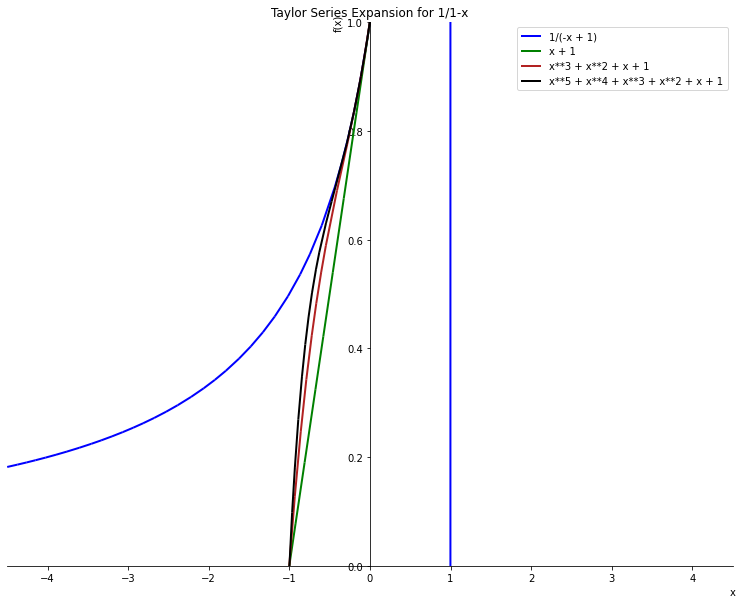

In [99]:

p = plot((1/(1-x)),taylor((1/(1-x)),0,2),taylor((1/(1-x)),0,4),taylor((1/(1-x)),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for 1/1-x'
p.show()

# *    $$ ln(x)$$ 

Podemos imprimir la función con un número indicado de iteraciones (orden de la ecuación) ,que entre más iteraciones, más exacta es. La definimos en un punto en especial, en este ejemplo tomamos el punto x=1.

In [110]:
print('ln(x) =', taylor(log(x,10), 0, 4))

ln(x) = log(x)/log(10)


In [107]:
print('ln(x) =', taylor(log(x,10), 0, 4).subs(x,1))



ln(x) = 0


Luego graficamos las funciones y como reduce su error con el paso de las iteraciones.

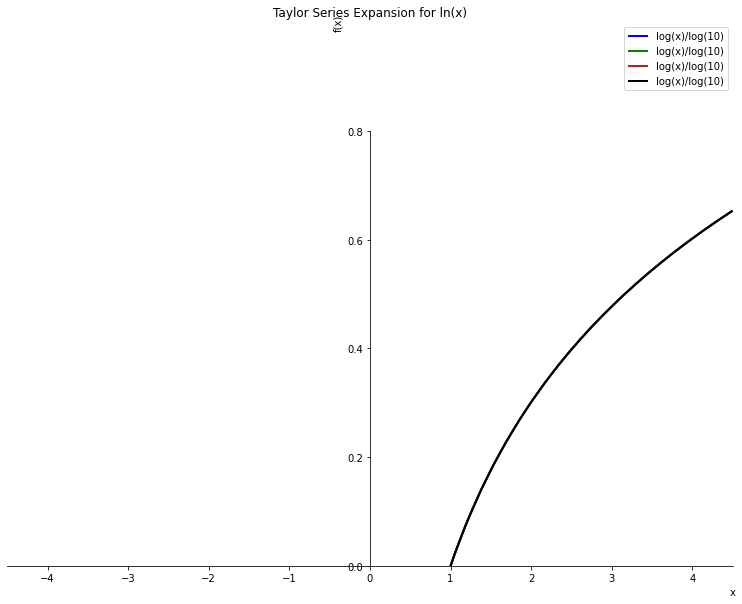

In [108]:

p = plot(log(x,10),taylor(log(x,10),0,2),taylor(log(x,10),0,4),taylor(log(x,10),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for ln(x)'
p.show()